In [1]:
%cd ..

c:\Users\CanAliYarman\Documents\cvpr_cw\cvpr_cw


In [2]:
!ls

MSRC_ObjCategImageDatabase_v2
classify
cwork_basecode_2012
cwsolution
harris
kmeans
lab1
lab2
lab3
matchdemo
mvg
netlab
output.png
python
shape
sift
snakes
testimages
util
vishull


In [ ]:
from cvpr_computedescriptors import cvpr_compute_descriptors


compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

# Compute the descriptors
# Options: joint_color_hist
#          global_color_hist
#          color_hist
#          color
#          random
#          sift
#          grid_descriptor
compute.compute_descriptors('color')
compute.compute_descriptors('joint_color_hist', bins=16)
compute.compute_descriptors('global_color_hist')
compute.compute_descriptors('color_hist')
compute.compute_descriptors('random')
compute.compute_descriptors('sift')
compute.compute_descriptors('grid_descriptor',bins=16)
compute.compute_descriptors('color_hist',bins=16)

In [2]:
from cvpr_computedescriptors import cvpr_compute_descriptors
compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('color_grid_descriptor',bins=16)

Computing color_grid_descriptor descriptors...


In [ ]:
from cvpr_computedescriptors import cvpr_compute_descriptors
compute = cvpr_compute_descriptors('MSRC_ObjCategImageDatabase_v2/Images/', 'python/descriptors/')

compute.compute_descriptors('edge_grid_descriptor',bins=16)

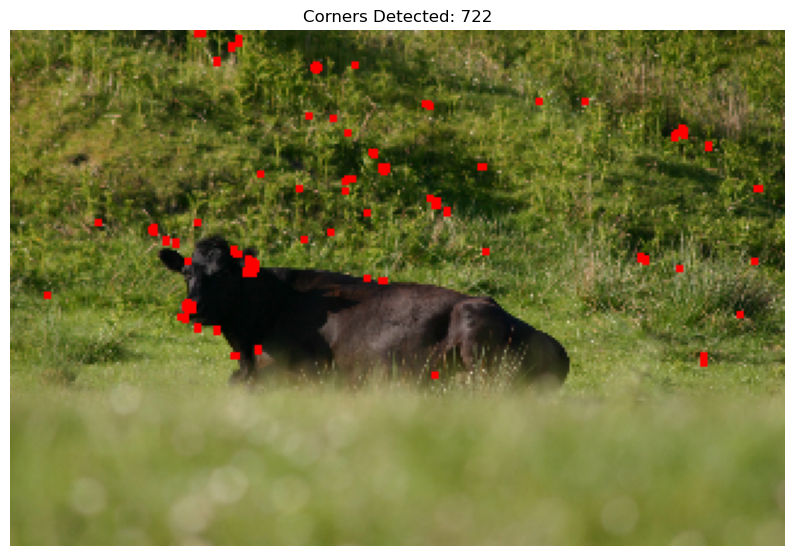

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def harris_corner_detector( img, block_size=2, ksize=3, k=0.04):
    # Convert the image to grayscale for corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Harris corner detection
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Dilate corner points for marking them
    dst = cv2.dilate(dst, None)

    # Create a copy of the original image (not grayscale) to mark the corners
    corner_img = img.copy()

    # Threshold for an optimal value, mark the corners in red on the original image
    corner_img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Assign red color to corner regions

    # Count the number of corners detected (you can also return other statistics)
    num_corners = np.sum(dst > 0.01 * dst.max())

    return num_corners, corner_img

test_img = cv2.imread('MSRC_ObjCategImageDatabase_v2/Images/5_5_s.bmp')
num_corners, corner_img = harris_corner_detector(test_img)
corner_img_rgb = cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)

# Show the image with corners marked
plt.figure(figsize=(10, 10))
plt.imshow(corner_img_rgb)
plt.axis('off')  # Hide the axis
plt.title(f'Corners Detected: {num_corners}')
plt.show()

In [ ]:

compute.compute_descriptors('edge_descriptor',bins=16)

In [3]:
import glob
glob.glob(vs.IMAGE_FOLDER)

[]

In [12]:
from cvpr_visualsearch import VisualSearch

vs = VisualSearch('python/descriptors/', 'MSRC_ObjCategImageDatabase_v2/Images/', 'performance')

color_descriptors = vs.load_descriptors('color_grid_descriptor')
query_basename, retreived_images_sorted = vs.visual_search(query_image_path='MSRC_ObjCategImageDatabase_v2\Images\16_14_s.bmp',distance_metric='mahalanobis_distance')

Performing visual search using color_grid_descriptor descriptors


In [14]:
query_basename

'9_28_s'

In [5]:
vs.descriptors_dict['10_10_s']

array([ 0,  1, 18, ...,  0,  0,  0], dtype=int64)

QUERY 9
For top-15 Precision: 0.0, Recall: 0.0


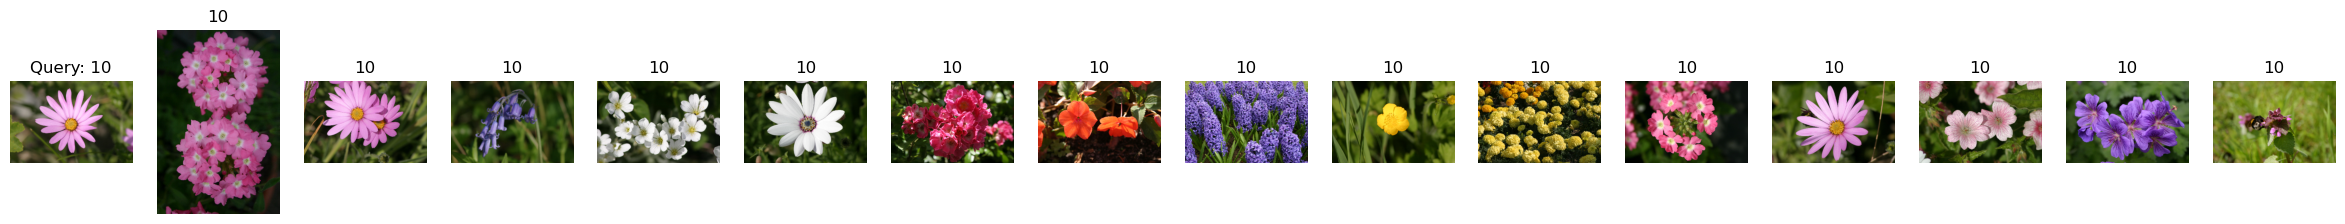

In [13]:
import matplotlib.pyplot as plt
import cv2
n = 15
f, axarr = plt.subplots(1, n+1, figsize=(30, 15)) 
DATASET_FOLDER = 'MSRC_ObjCategImageDatabase_v2/Images/'
# Left-most image is the query image
i = 0
query_label = {}
search_labels = []
precision, recall = vs.calculate_precision_recall(query_basename, retreived_images_sorted[1:], n+1)
print(f'For top-{n} Precision: {precision}, Recall: {recall}')
for image_dict in retreived_images_sorted[:n+1]:
    
    # label_path = LABELS_FOLDER + image_dict['image_name'].split('.')[0] + '_GT.json'
    # with open(label_path) as json_file:
    #     data = json.load(json_file)
    #     class_vector = list(data.values())

    #     if i == 0:
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 query_label[index_to_class_name[j]]= class_vector[j]
    #         # query_label = list(data.values())
    #     else:
    #         label_dict = {}
    #         for j in range(23):
    #             if class_vector[j] != 0:
    #                 label_dict[index_to_class_name[j]]= class_vector[j]
    #         search_labels.append(label_dict)
    #     # dist = calculate_distance(np.array(query_label), np.array(class_vector)) labels distance

        

    image_path = DATASET_FOLDER + image_dict['image_name'] + '.bmp'
    img = cv2.imread(image_path)  # Load the image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    axarr[i].imshow(img)  # Display the image
    if i == 0:
        axarr[i].set_title(f'Query: {image_dict["image_name"].split('_')[0]}')
    else:
        axarr[i].set_title(f'{image_dict["image_name"].split('_')[0]}')
    axarr[i].axis('off')  # Turn off axis if you don't want the grid lines
    i+=1
plt.show()